In [56]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [57]:
df=pd.read_pickle("../../results/cluster_1.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,...,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,0,1,0,0,0,0,0,1,0,0,...,0,0,2,2,19.432030,0.666667,0.0,7.921195,0.197514,1
21510,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,21.415513,-0.333333,1.0,9.382697,0.114641,1
35970,1,0,0,1,0,0,0,0,0,0,...,1,0,2,1,7.972381,1.000000,0.0,22.406446,-0.224678,1
38169,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,7.832012,1.333333,0.0,8.464854,-0.251842,1


In [58]:
df2=pd.read_pickle("../../results/cluster_sinencod_1.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.9710,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.4800,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.4850,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.5500,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.0200,810.25,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...
19661,First Class,Corporate,EU,Furniture,4363.350,5,0.0,305.4000,12.14,High,1
21510,First Class,Corporate,US,Technology,4799.984,2,0.2,359.9988,10.34,Medium,1
35970,Same Day,Consumer,APAC,Office Supplies,1840.680,6,0.0,846.5400,2.97,Medium,1
38169,First Class,Consumer,EU,Technology,1809.780,7,0.0,325.7100,2.38,Medium,1


In [59]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [60]:
df["Sales_robust"]=df2["Sales"]

In [61]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [62]:
params_arbol = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [50, 100, 150],
    'max_leaf_nodes': [30, 40, 50, 60, 70, 100]
}

randomized_search_arbol = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=params_arbol,
    n_iter=100,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

randomized_search_arbol.fit(x_train, y_train)
model_DecisionTreeRegressor=randomized_search_arbol.best_estimator_

In [63]:
y_train_pred=model_DecisionTreeRegressor.predict(x_train)
y_test_pred=model_DecisionTreeRegressor.predict(x_test)

In [64]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.555700,421.167700,352926.521100,594.076200
Test,0.425900,480.153200,456159.140500,675.395500
Diferencia Train-Test,0.129800,-58.985500,-103232.619400,-81.319300
Porcentaje diferencia (%),6.611700,-3.272200,-6.379600,-3.202900
Rango valores,5296.590000,5296.590000,5296.590000,5296.590000
Ratio Rango (%),0.009266,8.508502,7637.797730,11.983858
Influencia dif rango (%),0.002500,1.113700,1949.039300,1.535300
Media,1612.093400,1612.093400,1612.093400,1612.093400
Ratio Media(%),0.030445,27.954984,25094.255134,39.373392
Influencia dif media (%),0.008100,3.658900,6403.637600,5.044300


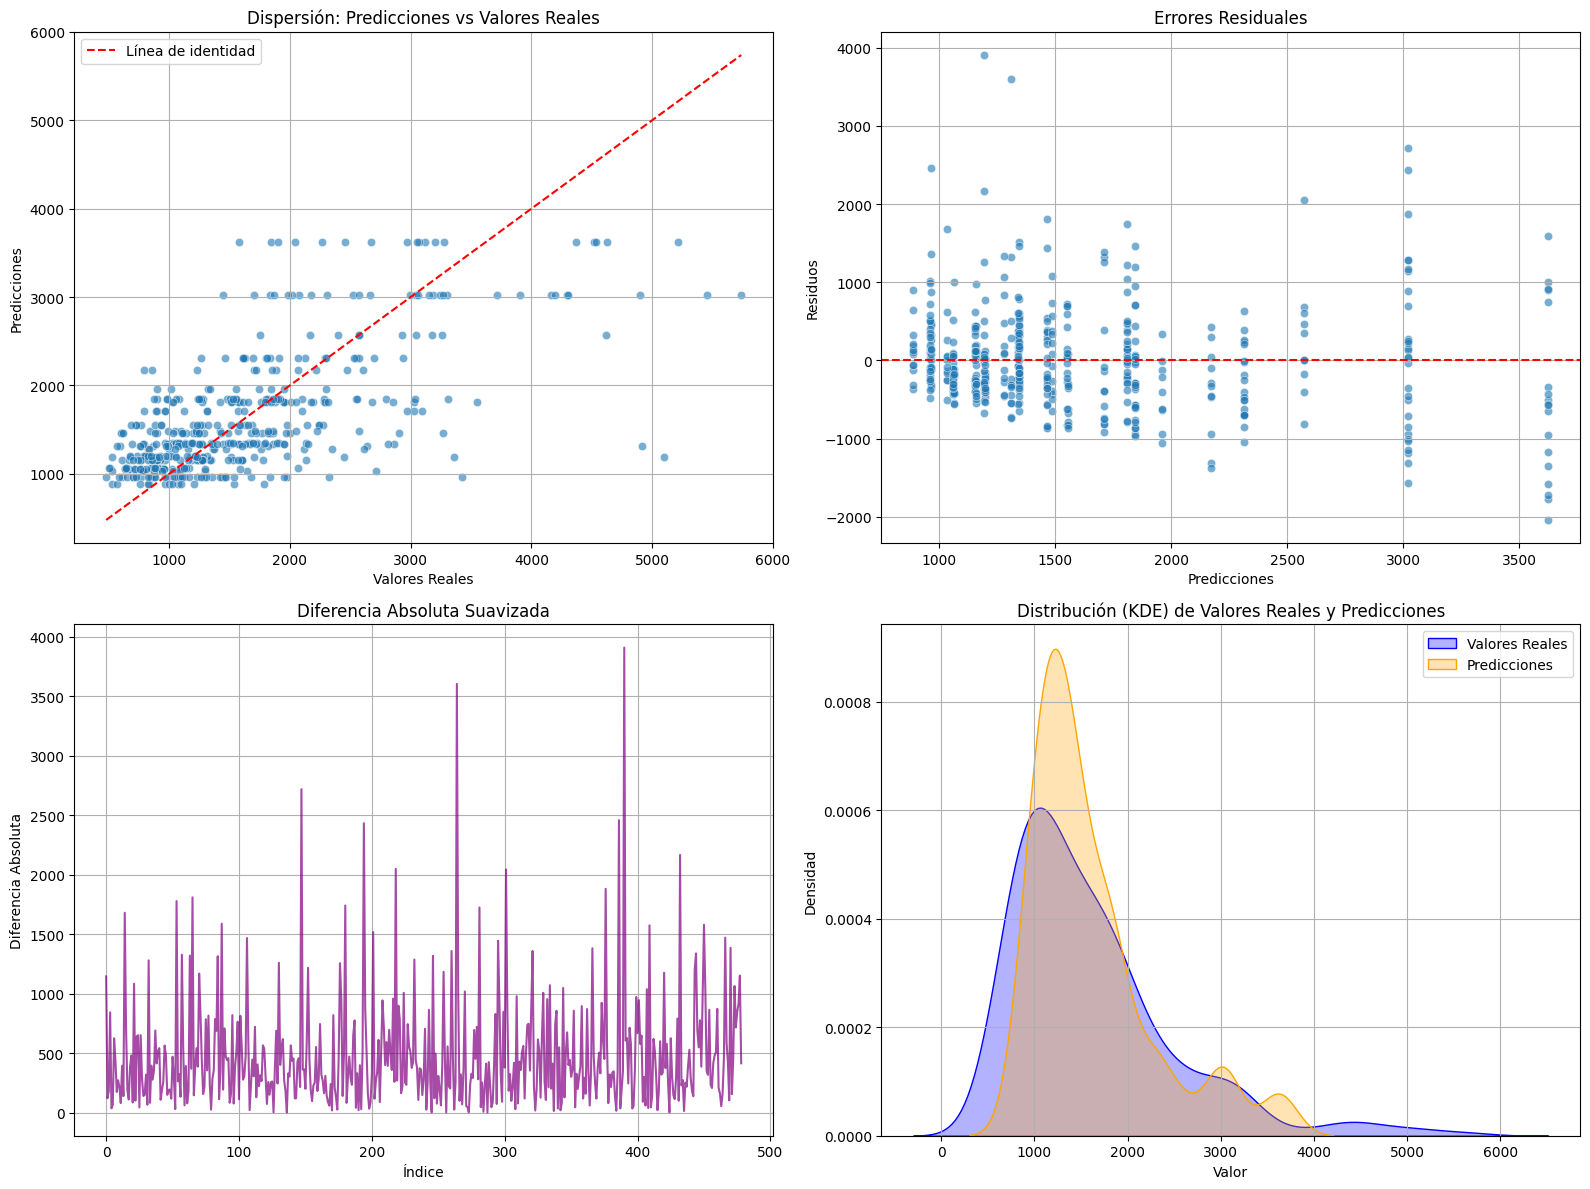

In [65]:
sp.comparativa_graficos(y_test, y_test_pred)

Gráfico superior izquierdo: Dispersión (Predicciones vs Valores Reales)
- Las predicciones muestran un buen ajuste en valores bajos y medios, pero existe una tendencia clara a subestimar valores altos, como lo indica la desviación de los puntos hacia debajo de la línea de identidad. Además, la dispersión de las predicciones aumenta con los valores reales, lo que refleja dificultades del modelo para capturar correctamente patrones extremos.

Gráfico superior derecho: Errores Residuales
- Los residuales están distribuidos principalmente alrededor de cero, lo que indica un desempeño razonable en general. Sin embargo, para valores altos de predicción, los residuales se vuelven más dispersos y tienden a ser positivos o negativos extremos, lo que sugiere inconsistencias en la predicción de valores altos.

Gráfico inferior izquierdo: Diferencia Absoluta Suavizada
- La diferencia absoluta tiene una variabilidad relativamente contenida en la mayoría de los casos, pero algunos picos significativos destacan, lo que podría deberse a outliers o situaciones donde el modelo no logra capturar correctamente la relación entre las variables.

Gráfico inferior derecho: Distribución (KDE) de Valores Reales y Predicciones
- Las distribuciones de los valores reales y predichos son similares en general, lo que indica que el modelo representa bien la tendencia global de los datos. Sin embargo, la curva de las predicciones muestra una densidad más baja en valores altos, confirmando que el modelo tiende a subestimar en este rango.

In [66]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_DecisionTreeRegressor_cluster_1.pkl', 'wb') as file:
    pickle.dump(model_DecisionTreeRegressor, file)